In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('Walmart_Sales.csv')
df.sample(10)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Store_Type,Store_Size
260733,27,20-05-2011,60.22,4.202,138.587106,7.725,False,2,76495.97,A,204184
177491,19,23-04-2010,46.87,3.021,132.022667,8.185,False,67,10843.33,A,203819
390973,42,23-07-2010,88.44,3.112,126.128355,9.199,False,85,97.01,C,39690
204546,21,13-04-2012,69.03,3.891,221.148403,6.891,False,12,2932.54,B,140167
350872,37,16-03-2012,67.48,3.734,219.895634,7.244,False,40,27491.27,C,39910
360677,39,16-04-2010,66.33,2.808,209.269143,8.464,False,87,4941.23,A,184109
314925,33,26-11-2010,56.87,3.162,126.669267,9.265,True,44,0.25,A,39690
239950,25,04-02-2011,23.94,3.231,205.732941,7.343,False,59,472.52,B,128107
356157,38,17-06-2011,86.84,3.935,129.043200,13.736,False,17,300.27,C,39690
283121,29,27-01-2012,35.68,3.568,136.959839,8.988,False,82,6608.59,B,93638


1. Histogram

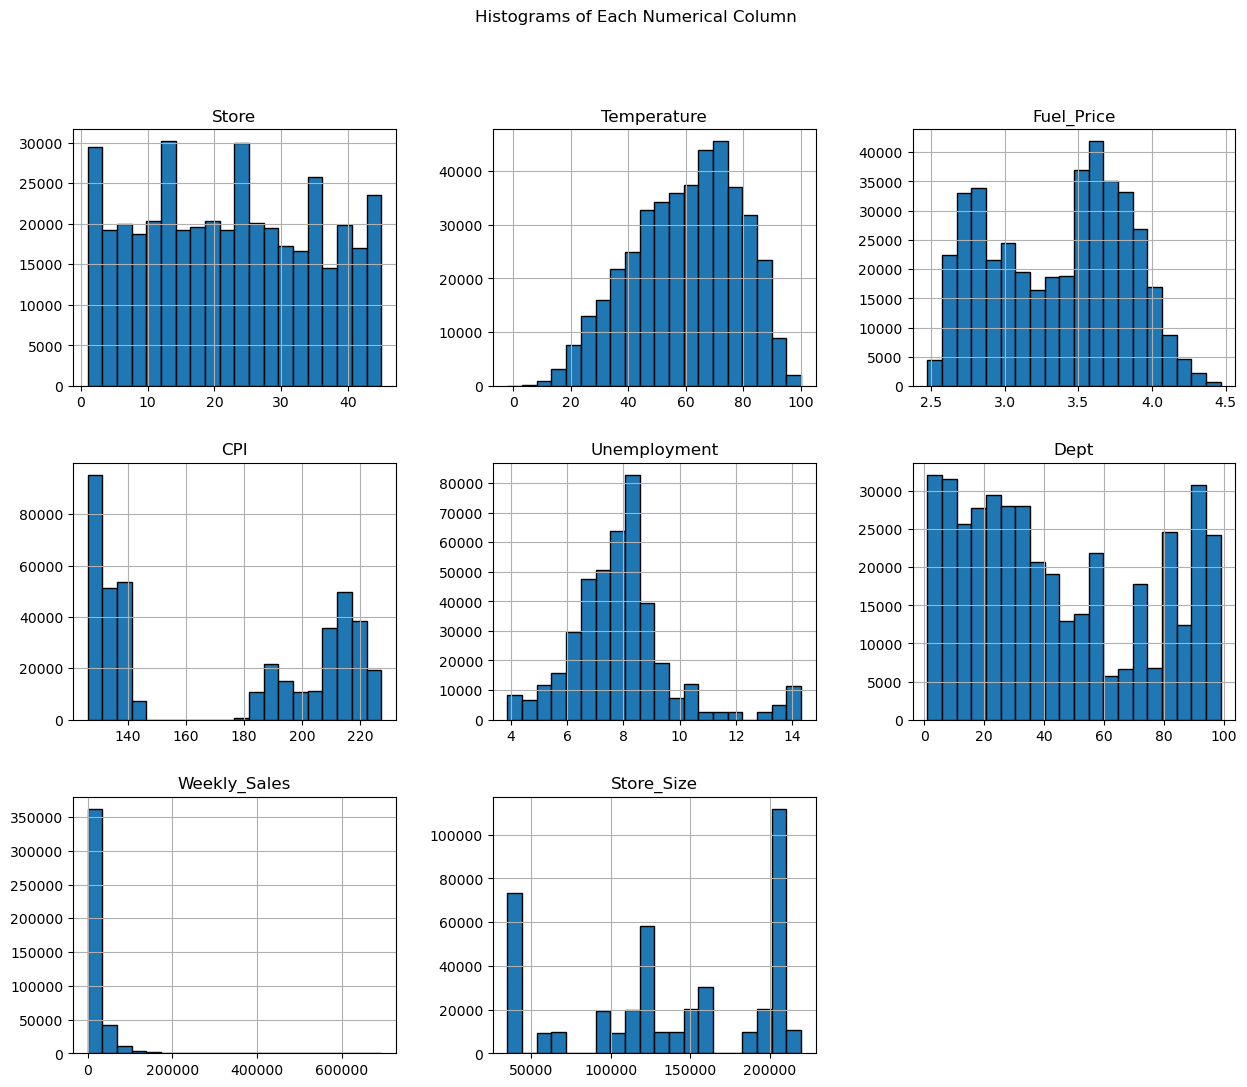

In [19]:
df.hist(bins=20, figsize=(15,12), edgecolor='black')
plt.suptitle('Histograms of Each Numerical Column')
plt.show()

2. Outliers in the dataset

Column: Store, Outliers Detected: 0
Column: Temperature, Outliers Detected: 67
Column: Fuel_Price, Outliers Detected: 0
Column: CPI, Outliers Detected: 0
Column: Unemployment, Outliers Detected: 32044
Column: Dept, Outliers Detected: 0
Column: Weekly_Sales, Outliers Detected: 35377
Column: Store_Size, Outliers Detected: 0


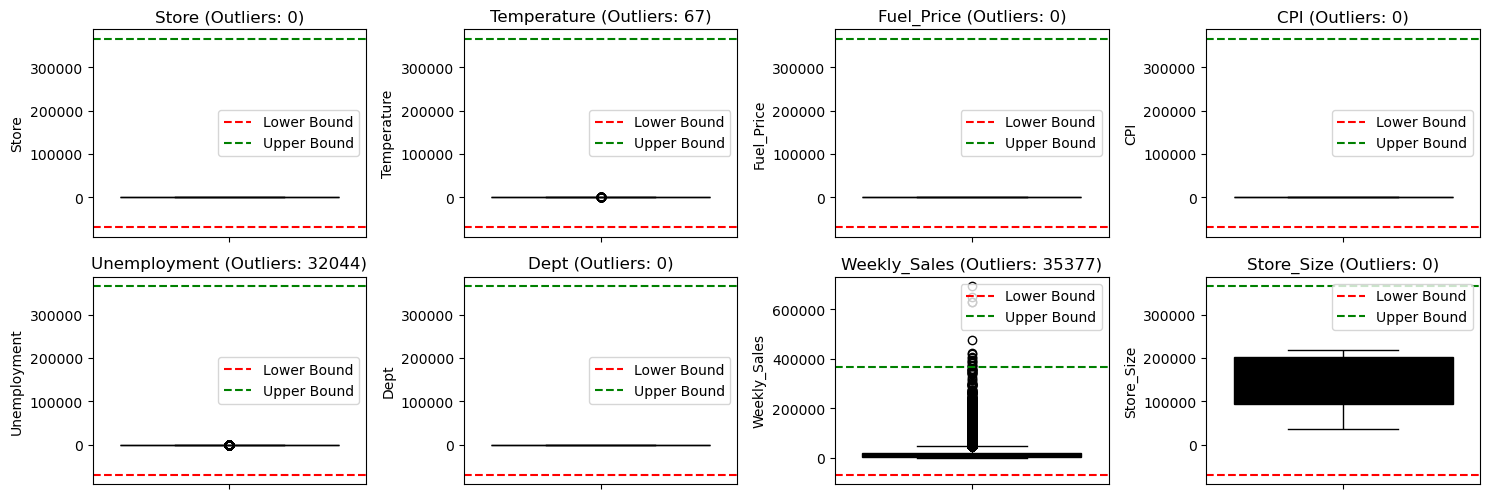

In [33]:
#Numerical columns
numerical_cols = df.select_dtypes(include='number').columns

#Outlier detection using IQR method 
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR

    #Number of Outliers in each column
    outliers = df[(df[col] < lb) | (df[col] > ub)]
    print(f"Column: {col}, Outliers Detected: {len(outliers)}")

    #Boxplot of the outliers
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col], color="black")
    plt.axhline(lb, color='red', linestyle='--', label='Lower Bound')
    plt.axhline(ub, color='green', linestyle='--', label='Upper Bound')
    plt.title(f'{col} (Outliers: {len(outliers)})')
    plt.legend()

plt.tight_layout()
plt.show()


3. Weekly sales each month

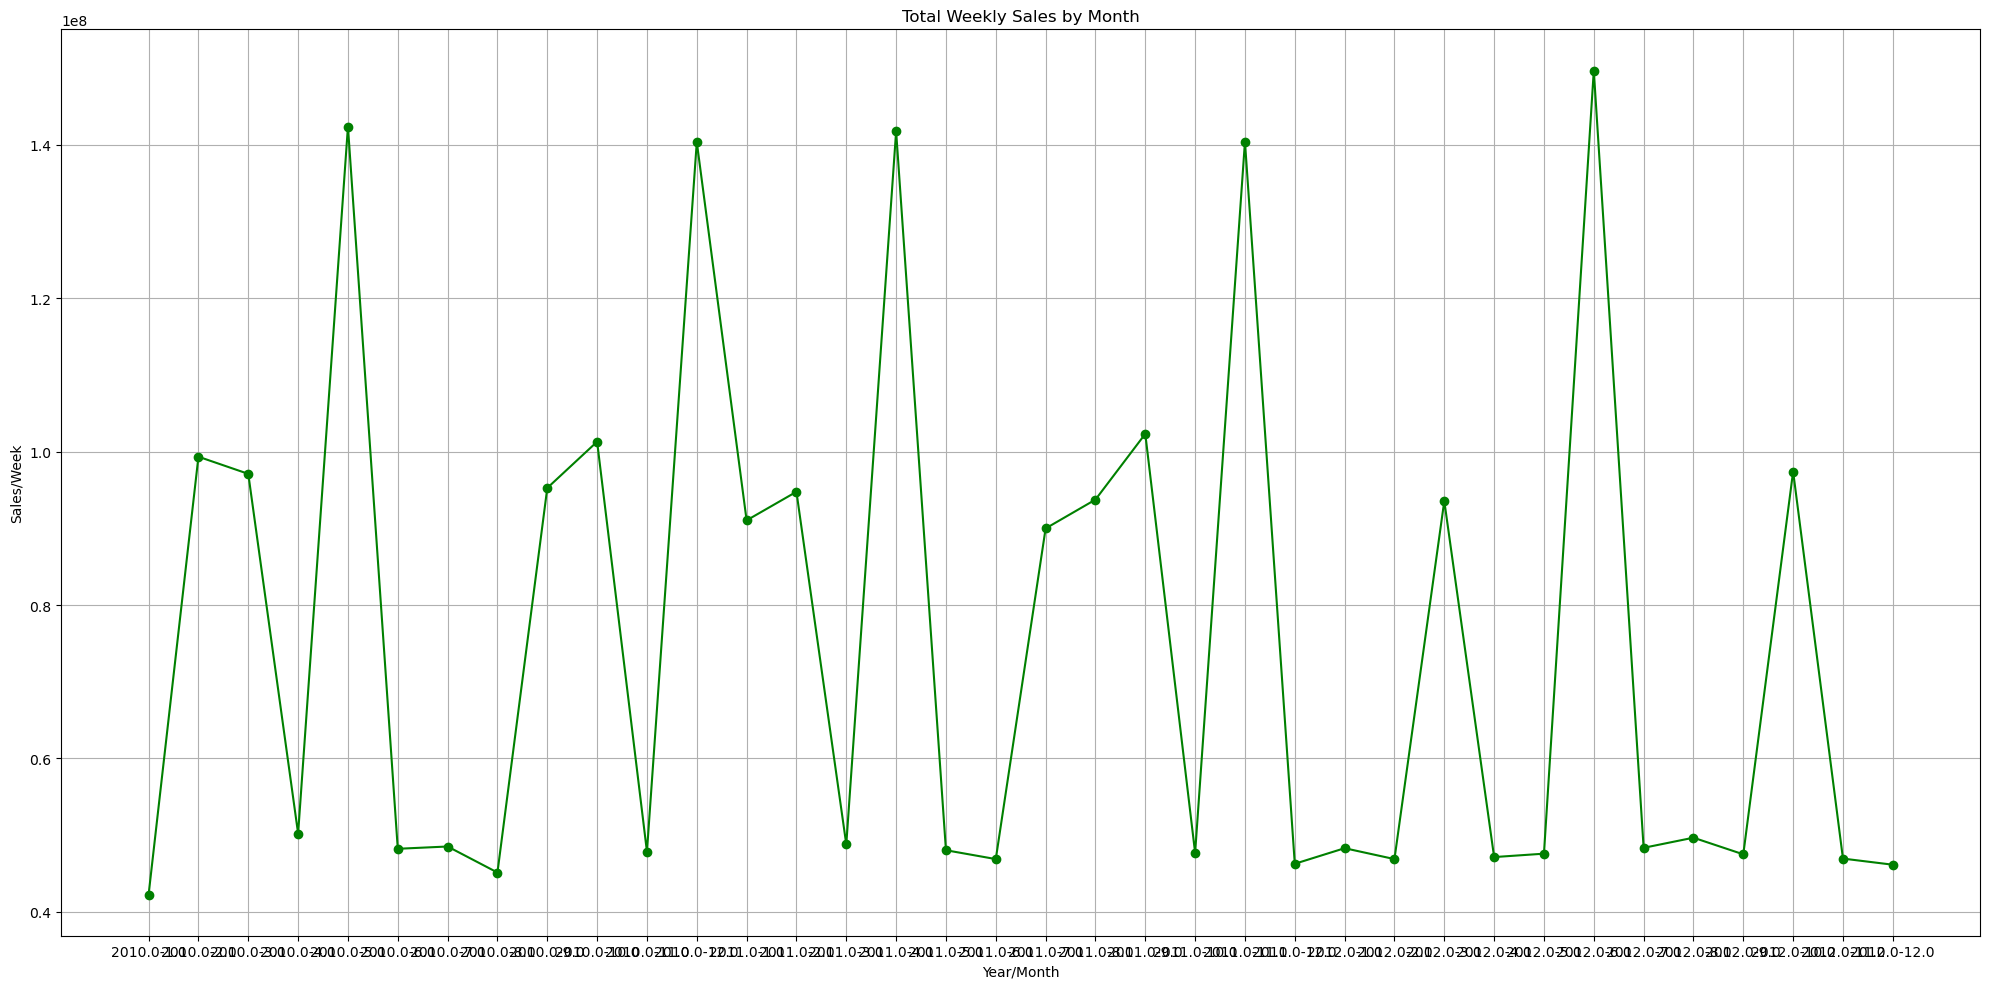

In [39]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#Separating the date column into year, month & day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

#Grouping Year & Month by weekly sales
Sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

#Weekly Sales every month
plt.figure(figsize=(20, 10))
plt.plot(Sales['Year'].astype(str) + '-' + Sales['Month'].astype(str), 
         Sales['Weekly_Sales'], marker='o', color='g')
plt.title('Total Weekly Sales by Month')
plt.xlabel('Year/Month')
plt.ylabel('Sales/Week')
plt.grid(True)
plt.tight_layout()
plt.show()

4. Holiday v/s Non Holiday weeks

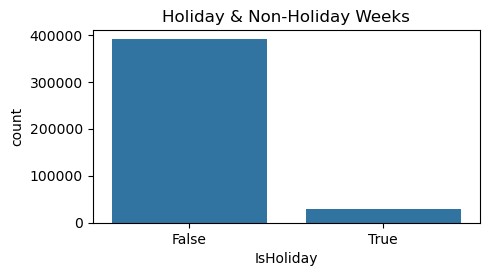

In [44]:
#Holiday & Non-Holiday Week
plt.figure(figsize=(5, 2.5))
sns.countplot(x='IsHoliday', data=df)
plt.title('Holiday & Non-Holiday Weeks')
plt.show()

5. Proportion of each store 

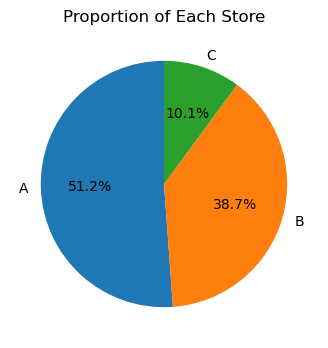

In [46]:
#Percentage of Each Store type
df['Store_Type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4), startangle=90)
plt.title('Proportion of Each Store')
plt.ylabel('')
plt.show()

6. Proportion of each store

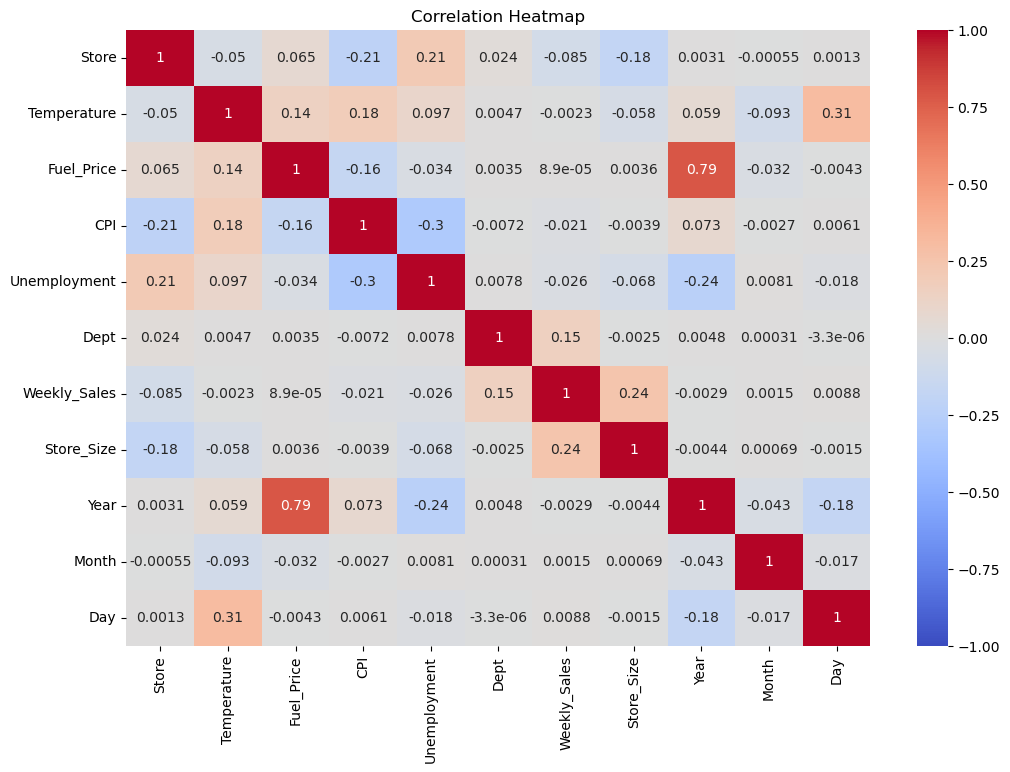

In [49]:
numerical_data = df.select_dtypes(include=['number'])
#Heatmap of Numerical Columns
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

7. Increase in Fuel prices overtime

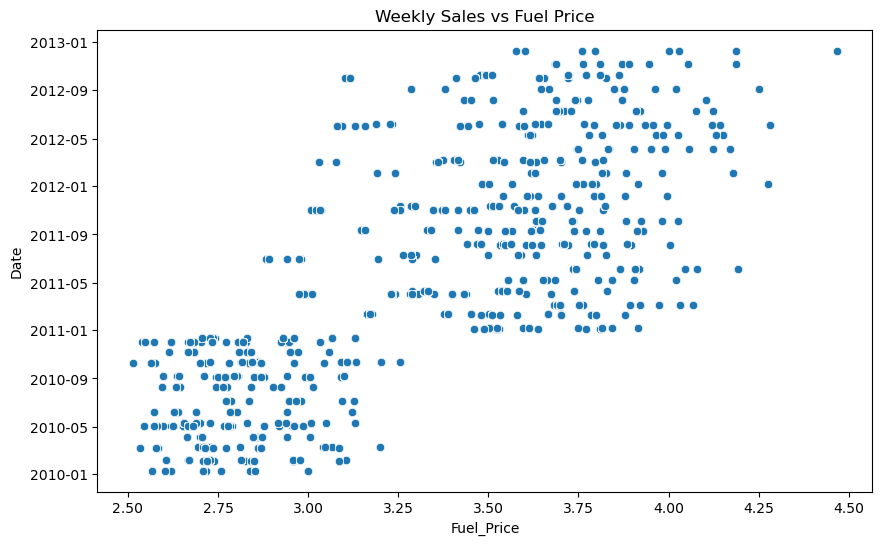

In [58]:
#Change in Fuel Price 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel_Price', y='Date', data=df)
plt.title('Weekly Sales vs Fuel Price')
plt.show()

8. Sales of each store

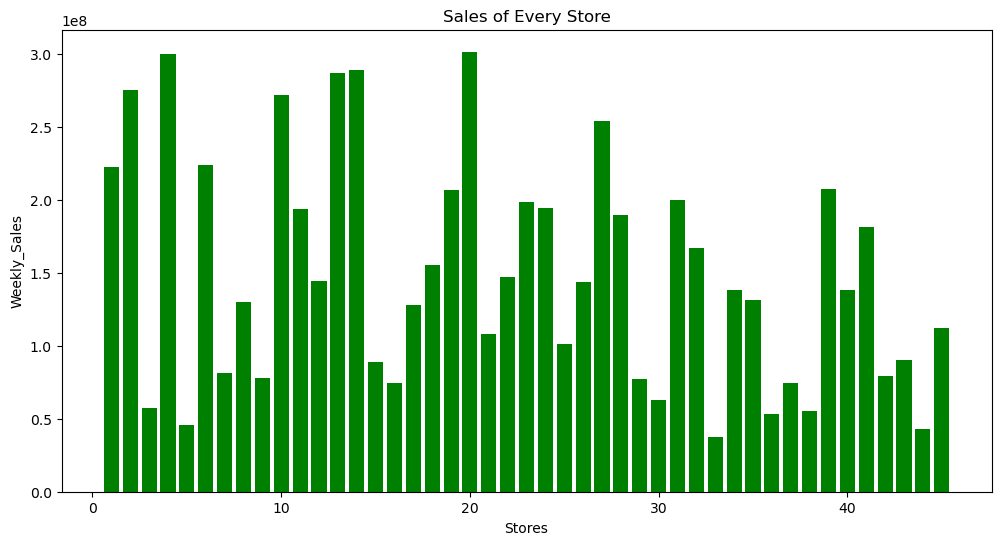

In [61]:
#Grouping the targeted columns
Store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Plot total sales by store
plt.figure(figsize=(12, 6))
plt.bar(Store['Store'], Store['Weekly_Sales'], color='green')
plt.title('Sales of Every Store')
plt.xlabel('Stores')
plt.ylabel('Weekly_Sales')
plt.show()

9. Sales of each department

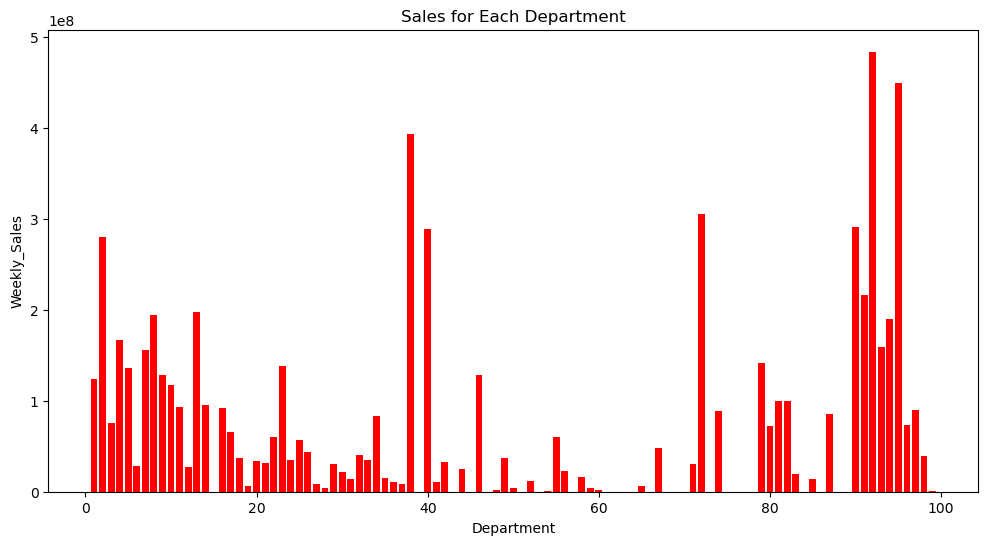

In [64]:
#Grouping the targeted columns
Department = df.groupby('Dept')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(Department['Dept'], Department['Weekly_Sales'], color='red')
plt.title('Sales for Each Department')
plt.xlabel('Department')
plt.ylabel('Weekly_Sales')
plt.show()